### 1.1 Basic

In [34]:
from konlpy.tag import Okt

okt = Okt() #빈도수를 나타내는 것

def build_bag_of_words(document):
    document = document.replace('.', '')
    tokenized_document = okt.morphs(document)
    
    word_to_index = {}
    bow = []
    
    for word in tokenized_document:
        if word not in word_to_index.keys(): #단어가 처음 나왔을 경우
            word_to_index[word] = len(word_to_index) #word가 키값, word_to_index는 vocabulary
            #현재 랭스에 -1해주고 1만큼 넣어줌
            bow.insert(len(word_to_index) -1, 1) #단어가 몇 번이 나왔냐? bow
#             print(word_to_index)

        else: #단어가 다시 나왔을 경우
            index = word_to_index.get(word)
            print(word, type(word_to_index))
            bow[index] = bow[index] + 1 #원래 1인데 두 번째 나오면 +1 해준다는 뜻
        
    return word_to_index, bow
    
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary:', vocab) #빈도수 상관없이 인덱스를 매김
print('bag of words vector :', bow) #단어가 몇 번 나왔냐 출력!

가 <class 'dict'>
물가상승률 <class 'dict'>
vocabulary: {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [14]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'
vocab, bow = build_bag_of_words(doc2)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [18]:
doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)

print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


### 1.2 BOW-CountVectorizer

In [20]:
# CountVectorizer : 띄어쓰기만으로 토큰화 진행 -> 한국어에 적합하지 않다.
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you']
vector = CountVectorizer()

#빈도수 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray())

#단어의 인덱스
print('vocabulary :', vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


### 1.3 BOW-불용어 제거(사용자 정의)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [23]:
# 사용자정의 불용어 적용
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words = ["the", "a", "an", "is", "not"])

print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


### 1.4 BOW-불용어 제거(CountVectorizer 포함된 불용어)

In [50]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")

print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


In [53]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


### ## 1.5 BOW-불용어 제거(NLTK 포함된 불용어)

In [55]:
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")
vect = CountVectorizer(stop_words=stop_words)
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

TypeError: 'str' object is not callable

## 2 문서 단어 행렬(Document-Term Maxtrix, DTM)
 문서 수를 행렬로 만들어놓은 것이다.

In [57]:
#희소백터
# 스펄시티 백터는 스펄시티하다 -> 빈도수가 낮은 단어 ..

#### 2.0.1 데이터 다운로드

In [61]:
# wget -c https://raw.githubusercontent.com/euphoris/datasets/master/imdb.xlsx

In [62]:
!pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=7042010079b4707bd81a77fd6eed397890b6d7fa775cbf0c52bb300310176cc7
  Stored in directory: c:\users\sweet home\appdata\local\pip\cache\wheels\8b\f1\7f\5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [63]:
#window일 경우
import wget

wget.download('https://raw.githubusercontent.com/euphoris/datasets/master/imdb.xlsx')

100% [..............................................................................] 55772 / 55772

'imdb.xlsx'

#### 2.0.2 데이터 열기

In [68]:
import pandas as pd

df = pd.read_excel('imdb.xlsx', index_col=0) #긍정인지 부정인지

In [70]:
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [67]:
df.shape

(748, 2)

## 2.3 TDM 만들기

In [74]:
#따로 기준 안 정해줘서 빈칸을 기준으로 구분함
#백터 = 표의 한 행
from sklearn.feature_extraction.text import CountVectorizer #문장의 순서를 다 무시하더라.

#max_features : 빈도순으로 최대 500단어까지 포함
#stop_words = 'english' : 불용어(관사, 전치사 등을 제거)
cv = CountVectorizer(max_features=500, stop_words = 'english') #한 번이라도 나온 단어를 다 표현해주는 맥스픽쳐, 단어목록은 cv에 있음
#여러 숫자로 넣어서 잘 되는 거 찾아보기. 꼭 500이 아니라. 더 좋은 선택이 있을 수 있음

In [75]:
tdm = cv.fit_transform(df['review']) 
#단어문서행렬로 변환할 어떤 텍스트, 문서를 넣어주게 되면 리뷰 텍스트분석을 컴다큐멘트매트릭으로 변환!
#띄어쓰기 기준으로 단어를 자른다, 불용어를 제거하고 순서대로 500개가 나온다.
tdm #-> 압축되어 있는 개체라 바로 볼 수 없다.
#3434 / 748*500 =? 몇 프로의 압축률일까 1%의 압축률 숫자가 1%밖에 없고 나머지는 0이다.


<748x500 sparse matrix of type '<class 'numpy.int64'>'
	with 3434 stored elements in Compressed Sparse Row format>

In [76]:
tdm.shape

(748, 500)

In [77]:
tdm.shape

(748, 500)

### 2.4 단어 목록

In [83]:
#,단어 목록을 볼 때는 tdm이 아니라 cv에 저장되어 있음.
# 이 경우 픽셀분석이기 때문에 단어가 피쳐. 기본함수 쓰면 단어가 500개
cv.get_feature_names()[:10] 
#원형으로 바꾸진 않고 띄어쓰기 기준으로 정리를 해서 같은 단어도 서로 다른 단어로 정리되어 있다. 순서대로 정리

['10',
 '20',
 '90',
 'absolutely',
 'acted',
 'acting',
 'action',
 'actor',
 'actors',
 'actress']

In [82]:
len(cv.get_feature_names())

500

### 2.5 단어별 총 빈도

In [86]:
tdm.sum(axis=0) #열별로 데이터를 보여준다 열별 단어 수

matrix([[ 29,   3,   6,   9,   3,  43,   7,  10,  19,   3,   3,  10,   3,
           4,   3,   4,   9,   3,   3,   3,   6,   3,   4,   3,  13,   4,
           3,   5,   3,   8,   5,   3,  14,  71,   4,  11,   4,   6,   8,
          25,  18,  10,   5,  10,   4,   3,   4,  10,   3,   3,   6,   7,
           3,   4,  10,   5,   3,  18,   6,   8,  24,  35,   4,   3,   7,
           3,   4,   5,   8,  10,   6,   5,   5,   7,   4,   3,   3,   5,
           3,   3,   4,   4,   7,   4,   5,   3,   4,   6,   4,   3,   5,
           4,   3,   5,   4,   3,   9,   3,   4,   3,  13,  11,  22,   5,
           3,   9,   5,  12,   6,   3,   9,  12,  26,   4,  10,   3,   3,
           3,   3,   4,   4,   3,   6,   3,   9,  11,  11,   4,   5,   3,
           9,   4,   6,   3,   8,   3,   3,  16,   4,   7,   4,   4,   5,
           8,   5,   7,   5,   7,   5,   3,   3,  10,   5, 163,  24,   3,
           3,   5,   6,   4,   5,  19,   3,   9,   3,   7,   5,   3,   4,
           3,   6,   3,   7,   3,   6,

In [87]:
tdm.sum(axis=1) #행별 단어 수

matrix([[  5],
        [  5],
        [ 12],
        [  3],
        [  6],
        [  7],
        [  2],
        [  7],
        [  2],
        [  2],
        [  1],
        [  4],
        [  3],
        [  1],
        [  5],
        [  5],
        [  6],
        [ 10],
        [  3],
        [229],
        [  5],
        [  2],
        [  5],
        [  3],
        [  1],
        [  2],
        [  4],
        [  2],
        [  7],
        [  3],
        [  1],
        [  0],
        [  1],
        [  3],
        [  4],
        [  6],
        [  3],
        [  6],
        [ 11],
        [  3],
        [  4],
        [  3],
        [  2],
        [  0],
        [  0],
        [  6],
        [  4],
        [  3],
        [  1],
        [  8],
        [  5],
        [  5],
        [  2],
        [  2],
        [  4],
        [  5],
        [  5],
        [  1],
        [  2],
        [  4],
        [  3],
        [  4],
        [  0],
        [  1],
        [  2],
        [  3],
        [ 

In [88]:
word_count = pd.DataFrame({
    '단어' : cv.get_feature_names(),
    '빈도' : tdm.sum(axis=0).flat #플랫해서 1차원으로 만들어줌 , tdm은 열!!
})

In [89]:
type(tdm.sum(axis=0))

numpy.matrix

In [90]:
word_count

,단어,빈도
0,10,29
1,20,3
2,90,6
3,absolutely,9
4,acted,3
...,...,...
495,wrong,3
496,year,5
497,years,14
498,yes,3


In [92]:
#word_count를 sorting해서 내림차순으로 봄
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
284,movie,182
153,film,163
33,bad,71
225,just,63
178,good,58


### 2.6 단어 빈도 저장

In [94]:
word_count.to_csv('word_count.csv') #내 아나콘다에 저장되어 있음

## 3 단어 구름(wordcloud)

## 3.1 wordcloud 설치

In [97]:
#아나콘다를 이용할 경우

!conda install -y -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\a\envs\study

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h8ffe710_7          18 KB  conda-forge
    brotli-bin-1.0.9           |       h8ffe710_7          21 KB  conda-forge
    freetype-2.10.4            |       h546665d_1         489 KB  conda-forge
    kiwisolver-1.4.4           |  py310h476a331_0          61 KB  conda-forge
    libbrotlicommon-1.0.9      |       h8ffe710_7          67 KB  conda-forge
    libbrotlidec-1.0.9         |       h8ffe710_7          33 KB  conda-forge
    libbrotlienc-1.0.9         |       h8ffe710_7         716 KB  conda-forge
    libtiff-4.0.10             |    h21b02b4_1005         1.0 MB  conda-forge
    libwebp-1.2.4              |       h8ffe710_0          76 KB  conda-forge
    libwe



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda





zstd-1.4.9           | 915 KB    | 6          |   7% 
zstd-1.4.9           | 915 KB    | #7         |  17% 
zstd-1.4.9           | 915 KB    | ##9        |  30% 
zstd-1.4.9           | 915 KB    | ####1      |  42% 
zstd-1.4.9           | 915 KB    | #####7     |  58% 
zstd-1.4.9           | 915 KB    | #######3   |  73% 
zstd-1.4.9           | 915 KB    | ########7  |  87% 
zstd-1.4.9           | 915 KB    | #########9 | 100% 
zstd-1.4.9           | 915 KB    | ########## | 100% 

libwebp-base-1.2.4   | 328 KB    |            |   0% 
libwebp-base-1.2.4   | 328 KB    | ##4        |  24% 
libwebp-base-1.2.4   | 328 KB    | ######3    |  64% 
libwebp-base-1.2.4   | 328 KB    | #########7 |  98% 
libwebp-base-1.2.4   | 328 KB    | ########## | 100% 

lz4-c-1.9.3          | 135 KB    |            |   0% 
lz4-c-1.9.3          | 135 KB    | #####9     |  59% 
lz4-c-1.9.3          | 135 KB    | ########## | 100% 

matplotlib-base-3.5. | 7.4 MB    |            |   0% 
matplotlib-base-3.5. | 7

In [98]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### 3.2 데이터 불러오기

In [3]:
import pandas as pd

word_count = pd.read_csv('word_count.csv', index_col=0)
word_count.head()

,단어,빈도
0,10,29
1,20,3
2,90,6
3,absolutely,9
4,acted,3


## 3.3 단어 구름

In [9]:
from wordcloud import WordCloud

#font_path: 글꼴의 경로
#max_words: 워드클라우드를 그릴 단어의 개수
#background_color: 배경색 설정
#width : 가로크기(픽셀 단위)
#height: 세로크기(픽셀 단위)
#배경은 흰색, 최대 100단어를 가로 400픽셀, 세로 300픽셀 크기로 단어 구름으로 그린다.
wc = WordCloud(background_color='white', max_words=100, width=400, height=300) #데이터에 대한 형태를 맞춰주는 것

In [8]:
word_count.set_index('단어')

,빈도
단어,
10,29
20,3
90,6
absolutely,9
acted,3
...,...
wrong,3
year,5
years,14


In [10]:
#단어에 대한 빈도를 보겠다.
word_count.set_index('단어')['빈도']

단어
10            29
20             3
90             6
absolutely     9
acted          3
              ..
wrong          3
year           5
years         14
yes            3
young          4
Name: 빈도, Length: 500, dtype: int64

In [14]:
#dictionary로 만드는 방법 1
count_dic = word_count.set_index('단어')['빈도'].to_dict()

count_dic #딕셔너리로 추출하겠다 키밸류로 데이터값이 추출됨

{'10': 29,
 '20': 3,
 '90': 6,
 'absolutely': 9,
 'acted': 3,
 'acting': 43,
 'action': 7,
 'actor': 10,
 'actors': 19,
 'actress': 3,
 'actresses': 3,
 'actually': 10,
 'addition': 3,
 'adorable': 4,
 'aerial': 3,
 'age': 4,
 'amazing': 9,
 'angel': 3,
 'animation': 3,
 'anne': 3,
 'annoying': 6,
 'appearance': 3,
 'appreciate': 4,
 'aren': 3,
 'art': 13,
 'attempt': 4,
 'attention': 3,
 'audience': 5,
 'average': 3,
 'avoid': 8,
 'away': 5,
 'awesome': 3,
 'awful': 14,
 'bad': 71,
 'barely': 4,
 'beautiful': 11,
 'beginning': 4,
 'believable': 6,
 'believe': 8,
 'best': 25,
 'better': 18,
 'big': 10,
 'bit': 5,
 'black': 10,
 'book': 4,
 'bore': 3,
 'bored': 4,
 'boring': 10,
 'bought': 3,
 'brilliance': 3,
 'brilliant': 6,
 'budget': 7,
 'called': 3,
 'came': 4,
 'camera': 10,
 'care': 5,
 'cartoon': 3,
 'cast': 18,
 'casting': 6,
 'certainly': 8,
 'character': 24,
 'characters': 35,
 'charles': 4,
 'charming': 3,
 'cheap': 7,
 'checking': 3,
 'chemistry': 4,
 'child': 5,
 'cinema':

In [15]:
#dictionary로 만드는 방법 2
dict(zip(word_count['단어'], word_count['빈도']))

{'10': 29,
 '20': 3,
 '90': 6,
 'absolutely': 9,
 'acted': 3,
 'acting': 43,
 'action': 7,
 'actor': 10,
 'actors': 19,
 'actress': 3,
 'actresses': 3,
 'actually': 10,
 'addition': 3,
 'adorable': 4,
 'aerial': 3,
 'age': 4,
 'amazing': 9,
 'angel': 3,
 'animation': 3,
 'anne': 3,
 'annoying': 6,
 'appearance': 3,
 'appreciate': 4,
 'aren': 3,
 'art': 13,
 'attempt': 4,
 'attention': 3,
 'audience': 5,
 'average': 3,
 'avoid': 8,
 'away': 5,
 'awesome': 3,
 'awful': 14,
 'bad': 71,
 'barely': 4,
 'beautiful': 11,
 'beginning': 4,
 'believable': 6,
 'believe': 8,
 'best': 25,
 'better': 18,
 'big': 10,
 'bit': 5,
 'black': 10,
 'book': 4,
 'bore': 3,
 'bored': 4,
 'boring': 10,
 'bought': 3,
 'brilliance': 3,
 'brilliant': 6,
 'budget': 7,
 'called': 3,
 'came': 4,
 'camera': 10,
 'care': 5,
 'cartoon': 3,
 'cast': 18,
 'casting': 6,
 'certainly': 8,
 'character': 24,
 'characters': 35,
 'charles': 4,
 'charming': 3,
 'cheap': 7,
 'checking': 3,
 'chemistry': 4,
 'child': 5,
 'cinema':

In [16]:
cloud = wc.fit_words(count_dic)

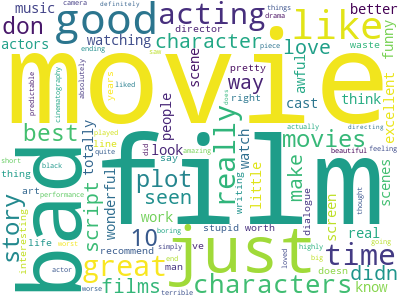

In [17]:
cloud.to_image() #여기의 내장함수

In [18]:
cloud.to_file('cloud.png')

In [19]:
import os
os.getcwd()
#현재 폴더에 대한 패스를 알 수 있음(경로)

'D:\\새싹 금융데이터\\Machine_Learning\\008. 자연어처리'

## 4 TF-IDF 문서들까지 볼 수 있지만 항상 성능이 좋은 건 아님

## 4.1 데이터 불러오기

In [25]:
import pandas as pd

df = pd.read_excel('imdb.xlsx', index_col=0)
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500, stop_words='english')
#l 엘 누르면 옆에 숫자 생김

In [34]:
tdm = tfidf.fit_transform(df['review'])
tdm

<748x500 sparse matrix of type '<class 'numpy.float64'>'
	with 3434 stored elements in Compressed Sparse Row format>

In [35]:
print(tdm)

  (0, 264)	0.43676152065842583
  (0, 499)	0.5112421488050499
  (0, 284)	0.23148088751652843
  (0, 286)	0.5112421488050499
  (0, 385)	0.48261672511123166
  (1, 185)	0.4508252485652821
  (1, 27)	0.4630757536620436
  (1, 61)	0.330043211383874
  (1, 253)	0.4775650258680224
  (1, 417)	0.4952984618525245
  (2, 293)	0.3326996842333155
  (2, 242)	0.30667834544717537
  (2, 319)	0.24142314513946203
  (2, 321)	0.3140711939059074
  (2, 5)	0.22041303500891976
  (2, 354)	0.32260561111952785
  (2, 108)	0.3140711939059074
  (2, 54)	0.2890474338764623
  (2, 71)	0.32260561111952785
  (2, 475)	0.30015739096222105
  (2, 43)	0.2943241984036562
  (2, 284)	0.15064019733663225
  (3, 394)	0.6747516922530598
  (3, 287)	0.5316526285937699
  (3, 244)	0.5119137000618044
  :	:
  (739, 146)	1.0
  (740, 9)	0.83021432552157
  (740, 182)	0.5574443234070687
  (741, 250)	0.6167137686897145
  (741, 481)	0.4797072301038725
  (741, 405)	0.4694360111750707
  (741, 239)	0.41130880407139175
  (742, 284)	1.0
  (743, 46)	0.59810

In [37]:
word_count = pd.DataFrame({
    '단어' : tfidf.get_feature_names(),
    'tf-idf' : tdm.sum(axis=0).flat
})

word_count.sort_values('tf-idf', ascending=False).head(5)

D:\a\envs\study\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,단어,tf-idf
284,movie,44.917213
153,film,40.356390
33,bad,25.258572
225,just,20.296871
178,good,18.604656
